In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import scipy.optimize as op

In [5]:
data = pd.read_csv("ex2data1.txt", names=["X1","X2","y"])

In [6]:
data.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Observing data

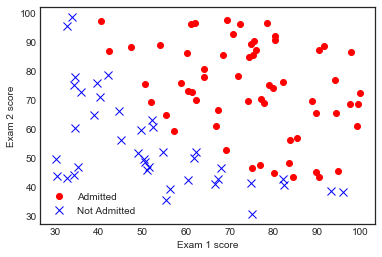

In [7]:
plt.plot(data[data.y==1].X1, data[data.y==1].X2, 'ko', markersize=6, c='r')
plt.plot(data[data.y==0].X1, data[data.y==0].X2, 'kx', markersize=8, c='b')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'])
plt.show()

### sigmoid, 0 <= h(x) <= 1

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### cost for a step and one step gradient functions

In [9]:
def cost_func(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta))
    J = 1/m * (np.dot((-y).T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))
    
    return np.ndarray.flatten(J)

In [10]:
def gradient(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta))
    grad = 1/m * np.dot((h-y).T, X)
    
    return np.ndarray.flatten(grad)

### examples

In [11]:
m, n = data.shape
X = np.hstack((np.ones((m)).reshape(m,1), data.iloc[:,0:2])) # 100x3
y = np.array(data['y']).reshape(m,1) # 100x1
initial_theta = np.zeros((n)).reshape((n,1)) # 3x1

In [12]:
cost = cost_func(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

In [13]:
print(cost, grad)

[0.69314718] [ -0.1        -12.00921659 -11.26284221]


In [14]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24,0.2,0.2]).reshape(3,1)

In [15]:
np.array([1,2,3]).reshape((3,1))
cost_test = cost_func(test_theta, X, y)
grad_test = gradient(test_theta, X, y)

In [16]:
print(cost_test, grad_test)

[0.21833019] [0.04290299 2.56623412 2.64679737]


### advanced optimization using *scipy.optimize.minize*

In [17]:
optimal_theta = op.minimize(fun = cost_func, 
                     x0 = initial_theta, 
                     method='TNC',
                     args = (X, y))

print(optimal_theta)

     fun: array([0.20349973])
     jac: array([-4.32986980e-06, -6.47679688e-03,  7.95988275e-03])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 26
  status: 3
 success: False
       x: array([-25.21853194,   0.20648101,   0.20215349])


In [18]:
th = optimal_theta.x

### plot decision boundary

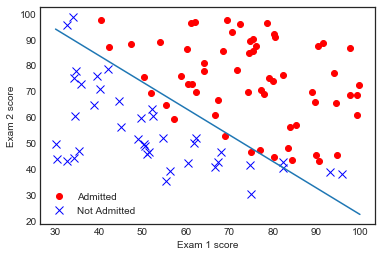

In [21]:
plt.plot(data[data.y==1].X1, data[data.y==1].X2, 'ko', markersize=6, c='r')
plt.plot(data[data.y==0].X1, data[data.y==0].X2, 'kx', markersize=8, c='b')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'])

u = np.linspace(30,100,70)
v = -(th[0] + th[1]*u)/th[2]
plt.plot(u,v)

plt.show()

### predict

In [22]:
def predict(theta, X):
    return np.round(sigmoid(np.dot(X,theta)))

In [23]:
# student with exam 1 score 45 and exam 2 score 85
# probability of being admitted
prob = sigmoid(np.dot([1, 45, 85],th))
print(round(prob,2))

0.78


In [24]:
p = predict(th, X)
print(np.mean(p == np.squeeze(y))*100)

89.0
